In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Importing image data into Numpy arrays

In [3]:
! pwd

/Users/andreasoggia/code/asoggia/tails-and-whales/notebooks


In [4]:
img = mpimg.imread('../raw_data/andrea_data_tails-and-whales/subset_3_train/000a8f2d5c316a.jpg')
img.shape

(2304, 3456, 3)

In [5]:
type(img)

numpy.ndarray

### Plotting Numpy arrays as images

<class 'matplotlib.image.AxesImage'>


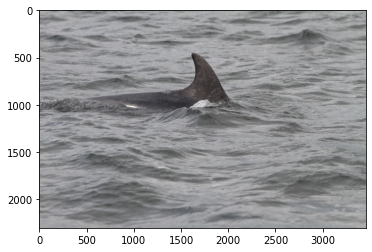

In [6]:
imgplot = plt.imshow(img, cmap='gray')
print(type(imgplot))

### Loading multiple images from a local directory

In [7]:
#!/usr/bin/python
from os import listdir

In [15]:
! pwd

/Users/andreasoggia/code/asoggia/tails-and-whales/notebooks


In [16]:
path = "../raw_data/train_sample_500/train_sample_image/"
images_list = listdir(path)
loaded_images = []

for image in images_list:
    img = mpimg.imread(path + image)
    loaded_images.append(img)

type(loaded_images)

list

In [17]:
len(loaded_images)

500

In [18]:
type(loaded_images[0])

numpy.ndarray

In [47]:
print(loaded_images[0].shape)
print(loaded_images[0].shape[2])

(2336, 3504, 3)
3


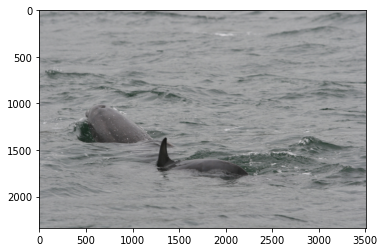

In [20]:
plt.imshow(loaded_images[0], cmap='gray')

In [21]:
X = np.asarray(loaded_images)

/var/folders/rw/z5rxgs8n5rq3xzxhn20lxbrr0000gn/T/ipykernel_36209/2680876176.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(loaded_images)


In [22]:
type(X)

numpy.ndarray

In [23]:
X.shape

(500,)

In [24]:
X[0].shape

(2336, 3504, 3)

In [25]:
X[1].shape

(2399, 3599, 3)

In [26]:
X[2].shape

(2400, 3600, 3)

In [14]:
# Warning message as X is composed of ndarray with different shape!! 

### Metadata extraction from image dataset

In [41]:
height = []
length = []
for img in loaded_images:
    height.append(img.shape[0])
    length.append(img.shape[1])

**Pay Attention :** at least one image is B&W meaning that the .shape output a tuple with only two values 

In [48]:
loaded_images[45].shape

(364, 910)

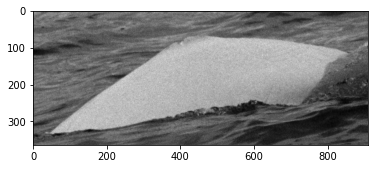

In [49]:
plt.imshow(loaded_images[45], cmap='gray')

**Code a function which will detect the index of B&W images**

In [63]:
list_index_bw = []
list_len = []
for index,img in enumerate(loaded_images[:500]):
    if len(img.shape) != 3:
        list_index_bw.append(index)
        list_len.append(len(img.shape))

In [64]:
list_index_bw

[45, 63, 79, 106, 125, 134, 142, 155, 190, 239, 281, 340, 439, 454, 469, 495]

In [65]:
list_len

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

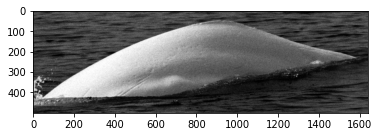

In [90]:
plt.imshow(loaded_images[190], cmap='gray')

In [67]:
loaded_images[190].shape

(500, 1640)

In [68]:
# How many images are in B&W?
len(list_index_bw)

16

In [69]:
X[190].shape

(500, 1640)

In [71]:
#Example of an B&W image
X[190]

array([[81, 78, 72, ..., 39, 35, 26],
       [74, 67, 79, ..., 40, 42, 49],
       [95, 82, 92, ..., 43, 50, 57],
       ...,
       [26, 21, 20, ..., 85, 82, 80],
       [20, 18, 13, ..., 79, 74, 76],
       [15, 23, 18, ..., 57, 51, 58]], dtype=uint8)

In [78]:
#Convert into a RGB image
stacked_img = np.stack((X[190],)*3, axis=-1)

In [79]:
stacked_img.shape

(500, 1640, 3)

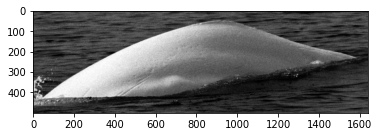

In [80]:
#Display the newly converted image
plt.imshow(stacked_img, cmap='gray')

**Code a function which will convert B&W image into RGB image**

In [82]:
for i in list_index_bw:
    X[i] = np.stack((X[i],)*3, axis=-1)

In [84]:
X[454].shape

(168, 499, 3)

### Creating pd.DataFrame

In [43]:
import pandas as pd
print(pd.__version__)

1.4.2


In [87]:
data = {'img': images_list, 'height': height, 'length': length}
df = pd.DataFrame.from_dict(data)
df

,img,height,length
0,4e5a4ed37bf9e2.jpg,2336,3504
1,4eb15fda99ffe7.jpg,2399,3599
2,edf88b28adac6f.jpg,2400,3600
3,8cb9be04270854.jpg,629,722
4,6f7a30b7463def.jpg,2400,3600
...,...,...,...
495,c90465a3e7d477.jpg,328,1131
496,97b9df64f453e0.jpg,207,1107
497,a5db819f39274c.jpg,382,1443
498,8d11430bef1b4c.jpg,2304,3456


### Plotting image size (scatterplot)

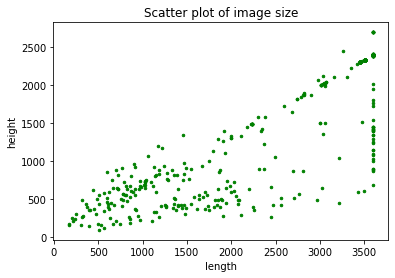

In [45]:
# Create data
length = df['length']
height = df['height']
area = np.pi*2

# Plot
plt.scatter(length, height, s=area, color= 'green')
plt.title('Scatter plot of image size')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

### Plotting image size (histplot)

### Resizing the images